In [1]:
## CS 5473
## Dr. Mohammad Imran Chowdhury
## Project_1 
## Clay Roberts
## gbi069

In [2]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
zipfile.ZipFile('names.zip').extractall('.')

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 36B0-4392

 Directory of C:\Users\clayw\Desktop\UTSA_work\2022Fall\Data Mining\Homeworks\homework1

08/30/2022  04:35 PM    <DIR>          .
08/30/2022  04:35 PM    <DIR>          ..
08/30/2022  01:54 PM    <DIR>          .ipynb_checkpoints
08/30/2022  02:46 PM         8,652,542 allyears.csv.gz
08/30/2022  02:05 PM    <DIR>          names
08/30/2022  01:49 PM         8,528,645 names.zip
08/30/2022  01:49 PM           526,314 Project 1.pdf
08/30/2022  04:35 PM           131,746 Project_1.ipynb
               4 File(s)     17,839,247 bytes
               4 Dir(s)  337,152,155,648 bytes free


In [5]:
ls names

 Volume in drive C has no label.
 Volume Serial Number is 36B0-4392

 Directory of C:\Users\clayw\Desktop\UTSA_work\2022Fall\Data Mining\Homeworks\homework1\names

08/30/2022  02:05 PM    <DIR>          .
08/30/2022  02:05 PM    <DIR>          ..
08/30/2022  04:36 PM           316,364 NationalReadMe.pdf
08/30/2022  04:36 PM            24,933 yob1880.txt
08/30/2022  04:36 PM            24,065 yob1881.txt
08/30/2022  04:36 PM            26,559 yob1882.txt
08/30/2022  04:36 PM            26,002 yob1883.txt
08/30/2022  04:36 PM            28,670 yob1884.txt
08/30/2022  04:36 PM            28,625 yob1885.txt
08/30/2022  04:36 PM            29,822 yob1886.txt
08/30/2022  04:36 PM            29,531 yob1887.txt
08/30/2022  04:36 PM            33,064 yob1888.txt
08/30/2022  04:36 PM            32,297 yob1889.txt
08/30/2022  04:36 PM            33,621 yob1890.txt
08/30/2022  04:36 PM            33,186 yob1891.txt
08/30/2022  04:36 PM            36,542 yob1892.txt
08/30/2022  04:36 PM            

In [6]:
df = pd.read_csv(r'./names/yob2011.txt', header=None)
df.columns = ['name', 'sex', 'number']
df['year'] = 2011
df

name sex  number  year
0        Sophia   F   21842  2011
1      Isabella   F   19910  2011
2          Emma   F   18803  2011
3        Olivia   F   17322  2011
4           Ava   F   15503  2011
...         ...  ..     ...   ...
33903     Zylar   M       5  2011
33904     Zylas   M       5  2011
33905     Zyran   M       5  2011
33906   Zyshawn   M       5  2011
33907  Zytavion   M       5  2011

[33908 rows x 4 columns]

In [7]:
df_list = []
for year in range(1880, 2019, 1):
    tmp = pd.read_csv(r'./names/' + 'yob' + str(year) + '.txt', header = None)
    tmp.columns = ['name', 'sex', 'number']
    tmp['year'] = year
    df_list.append(tmp)
allyears = pd.concat(df_list)
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957046 entries, 0 to 32032
Data columns (total 4 columns):
name      object
sex       object
number    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 74.7+ MB


In [8]:
allyears.to_csv('allyears.csv.gz', index=False)

In [9]:
allyears_indexed = pd.read_csv(r'./allyears.csv.gz')
allyears_indexed = allyears_indexed.set_index(['sex', 'name', 'year'])
allyears_indexed = allyears_indexed.sort_index()

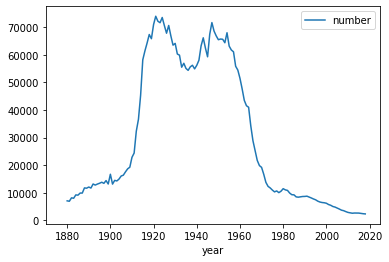

In [10]:
allyears_indexed.loc[('F', 'Mary')].plot()
plt.xlim([1870, 2025])
plt.show()

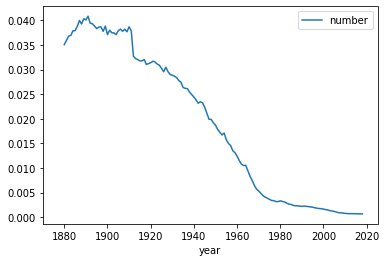

In [11]:
allyears_indexed
norm_mary = allyears_indexed.loc[('F', 'Mary')] / allyears_indexed.groupby('year').sum()
norm_mary.plot()
plt.xlim([1870, 2025])
plt.show()

In [12]:
def plotname(sex, name):
    plt.plot(allyears_indexed.loc[(sex, name)])

In [13]:
def comparenames(sex, names):
    for i in range(len(names)):
        plotname(sex, names[i])
    plt.show()

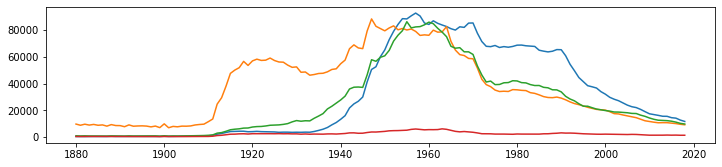

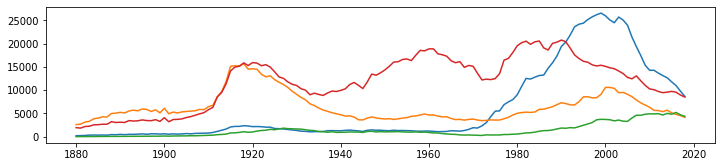

In [14]:
plt.rcParams["figure.figsize"] = (12, 2.5)
comparenames('M', ['Michael', 'John', 'David', 'Martin'])
comparenames('F', ['Emily', 'Anna', 'Claire', 'Elizabeth'])